# MidTerm Q2 Ana3

In [70]:
import requests
import json
import os
import csv
import operator
import glob
from nltk.probability import FreqDist
import time
import datetime 
from datetime import datetime


In [37]:
path = os.path.dirname(os.getcwd())+ '/API_Key/key2.txt'
print(path)
f = open(path, 'r', encoding = 'utf-8', errors = 'ignore')
key = f.read()

/Users/xiongyiming/Documents/INFO7374Python/Midterm/API_Key/key2.txt


In [40]:
def getAllArticles():
    i = 0
    while(i < 200):
        payload = {
            'api-key': key, 
            'q': "machine learning",
            'begin_date': "20000101",
            'end_date': "20170301",
            'page': i
        }
        r = requests.get('https://api.nytimes.com/svc/search/v2/articlesearch.json', params = payload).json()  
        path = os.path.dirname(os.getcwd())+ '/Data/articlesearch/'
        filename = "articlesearch_page" + str(i)
        i += 1
        time.sleep(0.4)
        with open(path + filename + '.json', 'a') as outfile:
            json.dump(r, outfile)
getAllArticles()

In [73]:
def readData():
    dateList = []
    pathList = []
    syspath = os.path.dirname(os.getcwd())+ '/Data/articlesearch/'
    for filepath in glob.glob(syspath + '*.json'):
        pathList.append(filepath)   
    for path in pathList:
    #   To get rid of the useless data
        if os.path.getsize(path) >= 1000 :
            f = open(path, 'r', encoding = 'utf-8', errors = 'ignore')
    #         content = f.read()
            data = json.load(f)       
            for book in data["response"].get("docs"):
                date = book["pub_date"]
#                 date = date.replace("-", "")
                dateList.append(date[:7])
                
    return dateList


In [74]:
dateList = readData()
dateListFreq  = FreqDist(dateList)
sorted_words = sorted(dateListFreq.items(), key=lambda dateListFreq: dateListFreq[0])
sorted_words

[('2000-01', 1),
 ('2000-02', 6),
 ('2000-03', 2),
 ('2000-04', 2),
 ('2000-05', 3),
 ('2000-06', 1),
 ('2000-07', 2),
 ('2000-08', 3),
 ('2000-09', 3),
 ('2000-11', 8),
 ('2000-12', 8),
 ('2001-01', 3),
 ('2001-02', 4),
 ('2001-03', 4),
 ('2001-04', 1),
 ('2001-06', 1),
 ('2001-07', 2),
 ('2001-08', 4),
 ('2001-09', 2),
 ('2001-10', 1),
 ('2001-11', 4),
 ('2001-12', 4),
 ('2002-01', 3),
 ('2002-02', 4),
 ('2002-03', 1),
 ('2002-04', 1),
 ('2002-05', 1),
 ('2002-06', 3),
 ('2002-07', 3),
 ('2002-08', 2),
 ('2002-09', 7),
 ('2002-10', 2),
 ('2002-11', 3),
 ('2003-01', 3),
 ('2003-02', 4),
 ('2003-03', 1),
 ('2003-04', 1),
 ('2003-05', 7),
 ('2003-07', 1),
 ('2003-08', 8),
 ('2003-09', 3),
 ('2003-10', 2),
 ('2003-11', 2),
 ('2003-12', 3),
 ('2004-01', 1),
 ('2004-02', 4),
 ('2004-03', 3),
 ('2004-04', 4),
 ('2004-05', 2),
 ('2004-06', 3),
 ('2004-07', 3),
 ('2004-08', 2),
 ('2004-09', 2),
 ('2004-10', 1),
 ('2004-11', 4),
 ('2004-12', 1),
 ('2005-01', 3),
 ('2005-02', 3),
 ('2005-03', 3

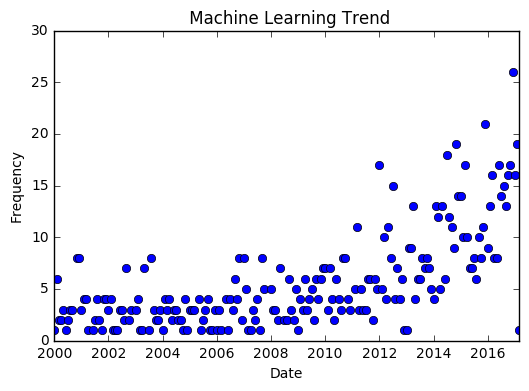

In [76]:
%matplotlib inline
from matplotlib import pyplot as plt


datetimeList = []
for item in sorted_words:
    date = datetime.strptime(item[0], '%Y-%m')
    datetimeList.append(date)


z_list = [z for [x, z] in sorted_words]

plt.plot_date(datetimeList, z_list)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title(" Machine Learning Trend")

